In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
def random_colormap(N: int,cmaps_='gist_ncar',show_=False):
    # 从颜色图（梯度多）中取N个
    # test_cmaps = ['gist_rainbow', 'nipy_spectral', 'gist_ncar']
    #cmap = matplotlib.colors.ListedColormap(plt.get_cmap(cmaps_)(np.linspace(0, 1, N)))
    cmap = np.concatenate([plt.get_cmap(cmaps_)(np.linspace(0, 1, N))])
    if show_:
        gradient = np.linspace(0, 1, 256)
        gradient = np.vstack((gradient, gradient))
        fig, ax = plt.subplots(1, 1, figsize=(5, 1))
        ax.imshow(gradient, aspect='auto', cmap=cmap)
        plt.show()
    return cmap


DatetimeIndex(['2022-02-15 12:30:00', '2022-02-15 12:50:00',
               '2022-02-15 13:10:00', '2022-02-15 13:30:00',
               '2022-02-15 13:50:00', '2022-02-15 14:10:00',
               '2022-02-15 14:30:00', '2022-02-15 14:50:00',
               '2022-02-15 15:10:00', '2022-02-15 15:30:00',
               '2022-02-15 15:50:00', '2022-02-15 16:10:00',
               '2022-02-15 16:30:00', '2022-02-15 16:50:00',
               '2022-02-15 17:10:00', '2022-02-15 17:30:00',
               '2022-02-15 17:50:00', '2022-02-15 18:10:00',
               '2022-02-15 18:30:00', '2022-02-15 18:50:00',
               '2022-02-15 19:10:00', '2022-02-15 19:30:00',
               '2022-02-15 19:50:00', '2022-02-15 20:10:00',
               '2022-02-15 20:30:00', '2022-02-15 20:50:00',
               '2022-02-15 21:10:00', '2022-02-15 21:30:00',
               '2022-02-15 21:50:00', '2022-02-15 22:10:00',
               '2022-02-15 22:30:00', '2022-02-15 22:50:00',
               '2022-02-

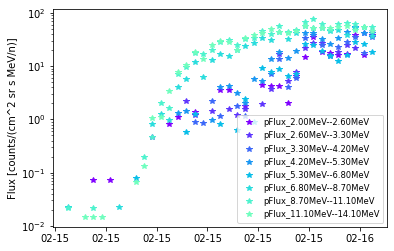

In [18]:
from tracemalloc import start
import pandas as pd


import time
import datetime as dt
def str2time(string):
    struct_time= time.strptime(string,"%Y-%m-%dT%H:%M:%S.%fZ")
    #print (struct_time)
    string_time= time.strftime("%Y-%m-%d %H:%M:%S", struct_time)
    return (dt.datetime.strptime(string_time, '%Y-%m-%d %H:%M:%S') )
def str2time_num(string):
    struct_time= time.strptime(string,"%Y-%m-%dT%H:%M:%S.%fZ")
    #print (struct_time)
    string_time= time.strftime("%Y-%m-%d %H:%M:%S", struct_time)
    return (time.mktime( struct_time))
def sec2time(sec):
    struct_time= time.strftime(string,"%Y-%m-%dT%H:%M:%S.%fZ")
    #print (struct_time)
    string_time= time.strftime("%Y-%m-%d %H:%M:%S", struct_time)
    return (dt.datetime.strptime(string_time, '%Y-%m-%d %H:%M:%S') )

pflux=pd.read_csv("D:\Python310\myjupyter\MEPA\SEPFlux_20220215_20min.csv")
starttime = time.mktime(time.strptime('2016-1-1 00:00:00', '%Y-%m-%d %H:%M:%S'))
pflux["second"]=pflux["second"]+starttime

pflux.set_index("second", inplace = True)
#print(pflux.index+1e9)
pflux.index = pd.to_datetime(pflux.index, unit="s")
print(pflux.index)

fig,ax=plt.subplots()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
cmap=random_colormap(16, "rainbow")
ax.set_ylabel("Flux [counts/(cm^2 sr s MeV/n)]")
for i, colume in  enumerate([colume for colume in pflux][:8]):
    print (colume,)
    ax.plot(pflux[colume][:37], "*", color=cmap[i], label=colume)
    #ax.plot(pflux[colume][38:], "*", color=cmap[i])
ax.legend(fontsize="small")
ax.set_yscale("log")
plt.show()

MSL/RAD doserate

['dose_E(mGy/day)', 'dose_B(mGy/day)']
pFlux_2.00MeV--2.60MeV


C:\Users\25071\AppData\Local\Temp\ipykernel_10328\1039223597.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data=pd.read_csv("D:\Python310\myjupyter\MEPA\Feb_2022_SEP.dat", sep="\t", error_bad_lines=False)


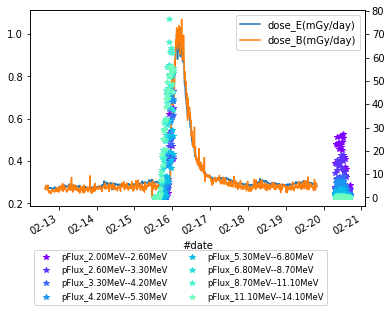

In [38]:
import matplotlib.dates as mdates 

data=pd.read_csv("D:\Python310\myjupyter\MEPA\Feb_2022_SEP.dat", sep="\t", error_bad_lines=False)
data.set_index("#date", inplace=True)
data.index = pd.to_datetime(data.index)
print([colume for colume in data])
print(pflux.columns[0])
fig, ax=plt.subplots()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
ax1=ax.twinx()

data.plot(ax=ax)
for i, colume in  enumerate([colume for colume in pflux][:8]):
    ax1.plot(pflux[pflux.columns[i]], "*", color=cmap[i], label=pflux.columns[i])
ax1.legend(bbox_to_anchor=(0.9,-0.2), ncol=2, fontsize="small")

[ 2.   2.6  3.3  4.2  5.3  6.8  8.7 11.1 14.1 18.1 23.1 29.4 37.6 48.
 61.3 78.3] [  2.6   3.3   4.2   5.3   6.8   8.7  11.1  14.1  18.1  23.1  29.4  37.6
  48.   61.3  78.3 100. ]


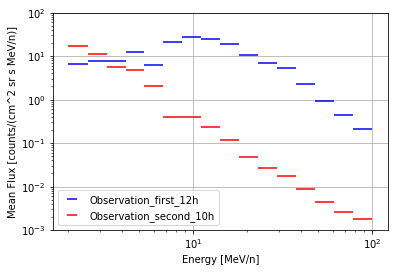

In [3]:
from matplotlib.pyplot import pause


name_list=np.array([colume for colume in pflux][:16])
e_min=np.zeros(name_list.size)
e_max=np.zeros(name_list.size)
flux=np.zeros(name_list.size)
flux_b=np.zeros(name_list.size)
for i, name in enumerate( name_list):
	flux[i]=pflux[name][:37].mean()
	flux_b[i]=pflux[name][38:].mean()
	# print(pflux[name].values,"mean",pflux[name].values.mean())
	# break
	

	e_min[i]=np.float64( name[6:10])
	try:
		e_max[i]=np.float64( name[16:21])
	except:
		e_max[i]=np.float64( name[15:-3])

print(e_min,e_max)
e_mean=0.5*(e_max+e_min)
xerr = np.zeros([2,e_mean.size])
xerr[0,:] = e_mean - e_min
xerr[1,:] = e_max - e_mean

fig,ax=plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Energy [MeV/n]")
ax.set_ylabel("Mean Flux [counts/(cm^2 sr s MeV/n)]")
ax.set_ylim(1e-3,1e2)
ax.grid()
ax.errorbar(e_mean,flux,xerr=xerr[:,:],ecolor='b',elinewidth=1.5,mfc='orange',\
	mec='k',mew=1,ms=10,alpha=1,capsize=0,capthick=3,linestyle="none",label="Observation_first_12h")
ax.errorbar(e_mean,flux_b,xerr=xerr[:,:],ecolor='r',elinewidth=1.5,mfc='orange',\
	mec='k',mew=1,ms=10,alpha=1,capsize=0,capthick=3,linestyle="none",label="Observation_second_10h")
# #ax.errorbar(goes_data[:,1],goes_data[:,4]*((1/1.5)**2),xerr=goes_err[:,:],ecolor='k',marker="d",elinewidth=1.5,mfc='orange',\
# 	mec='k',mew=1,ms=3,alpha=1,capsize=0,capthick=3,linestyle="none",label="guo_20211028_104h")
# #ax.errorbar(goes_data[:,1],(goes_data[:,4]-goes_data[:,3])*((1/1.5)**2),xerr=goes_err[:,:],ecolor='k',marker="s",elinewidth=1.5,mfc='green',\
# 	mec='k',mew=1,ms=3,alpha=1,capsize=0,capthick=3,linestyle="none",label="guo_remove_background")
ax.legend()
plt.show()


[ 2.   2.6  3.3  4.2  5.3  6.8  8.7 11.1 14.1 18.1 23.1 29.4 37.6 48.
 61.3 78.3] [  2.6   3.3   4.2   5.3   6.8   8.7  11.1  14.1  18.1  23.1  29.4  37.6
  48.   61.3  78.3 100. ]


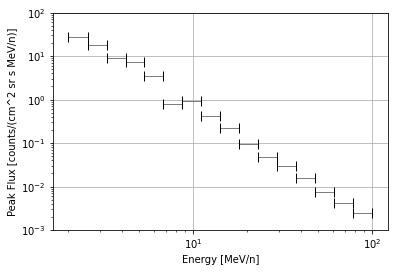

In [4]:
from matplotlib.pyplot import pause


name_list=np.array([colume for colume in pflux][:16])
e_min=np.zeros(name_list.size)
e_max=np.zeros(name_list.size)
flux=np.zeros(name_list.size)
for i, name in enumerate( name_list):
	flux[i]=pflux[name][38:].max()
	# print(pflux[name].values,"mean",pflux[name].values.mean())
	# break
	

	e_min[i]=np.float64( name[6:10])
	try:
		e_max[i]=np.float64( name[16:21])
	except:
		e_max[i]=np.float64( name[15:-3])

print(e_min,e_max)
e_mean=0.5*(e_max+e_min)
xerr = np.zeros([2,e_mean.size])
xerr[0,:] = e_mean - e_min
xerr[1,:] = e_max - e_mean

fig,ax=plt.subplots()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Energy [MeV/n]")
ax.set_ylabel("Peak Flux [counts/(cm^2 sr s MeV/n)]")
ax.set_ylim(1e-3,1e2)
ax.grid()
ax.errorbar(e_mean,flux,xerr=xerr[:,:],ecolor='k',elinewidth=0.5,mfc='orange',\
	mec='k',mew=1,ms=10,alpha=1,capsize=5,capthick=3,linestyle="none",label="Observation")
plt.show()


In [5]:
import matplotlib
import numpy as np
def random_colormap(N: int,cmaps_='gist_ncar',show_=False):
    # 从颜色图（梯度多）中取N个
    # test_cmaps = ['gist_rainbow', 'nipy_spectral', 'gist_ncar']
    cmap = matplotlib.colors.ListedColormap(plt.get_cmap(cmaps_)(np.linspace(0, 1, N)))
    if show_:
        gradient = np.linspace(0, 1, 256)
        gradient = np.vstack((gradient, gradient))
        fig, ax = plt.subplots(1, 1, figsize=(5, 1))
        ax.imshow(gradient, aspect='auto', cmap=cmap)
        plt.show()
    return cmap


In [6]:
import matplotlib
import numpy as np
def random_colormap(N: int,cmaps_='gist_ncar',show_=False):
    # 从颜色图（梯度多）中取N个
    # test_cmaps = ['gist_rainbow', 'nipy_spectral', 'gist_ncar']
    cmap = matplotlib.colors.ListedColormap(plt.get_cmap(cmaps_)(np.linspace(0, 1, N)))
    if show_:
        gradient = np.linspace(0, 1, 256)
        gradient = np.vstack((gradient, gradient))
        fig, ax = plt.subplots(1, 1, figsize=(5, 1))
        ax.imshow(gradient, aspect='auto', cmap=cmap)
        plt.show()
    return cmap
